## 1. PCA
wine 데이터 세트의 13개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인하려 합니다. ###답안###을 채우세요.

In [1]:
# 실습에 필요한 라이브러리를 실행해주세요.

import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# wine 데이터셋을 확인해주세요

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head(3)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


1-1. 와인 데이터 세트에 PCA를 적용해 13차원에서 2차원 PCA로 변환하세요.

In [3]:
wine_scaled = StandardScaler().fit_transform(df.iloc[:, :-1]) # PCA를 바로 적용하기 전 개별 속성을 함께 스케일링

pca = PCA(n_components=2)

pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


1-2. 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화하세요.

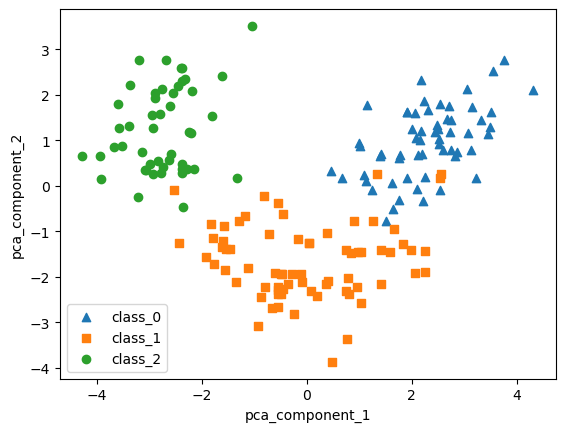

In [4]:
pca_columns=['pca_component_1','pca_component_2']
df_pca = pd.DataFrame(wine_pca, columns = pca_columns)
df_pca['target']=wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pca_component_2를 y축으로
for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

1-3. 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 구하세요

In [5]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


1-4. 1-3을 바탕으로 원본 데이터를 2차원으로 줄였을 때 원본 데이터의 변동성을 얼마나 설명할 수 있는지 간략히 서술하세요.

###답안###

PCA의 첫 번째 컴포넌트(PC1)는 전체 변동성의 약 36%, 두 번째 컴포넌트(PC2)는 약 19%를 설명하므로
두 개의 컴포넌트를 합치면 약 55%의 변동성을 설명한다.

즉, 13개의 원래 차원 중 2개의 차원만으로도 데이터의 절반 이상을 보존할 수 있으므로 시각화나 차원 축소의 목적에는 충분히 유용한 변환이라고 볼 수 있다.

## 2. LDA
wine 데이터 세트를 LDA 변환하려 한다. ###답안###을 채우세요.

2-1. 앞서 스케일링한 wine 데이터 세트를 2개의 컴포넌트로 LDA변환하세요

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)
print(wine_lda.shape)

(178, 2)


2-2. LDA 변환된 입력 데이터 값을 2차원 평면에 wine class별로 표현하세요.

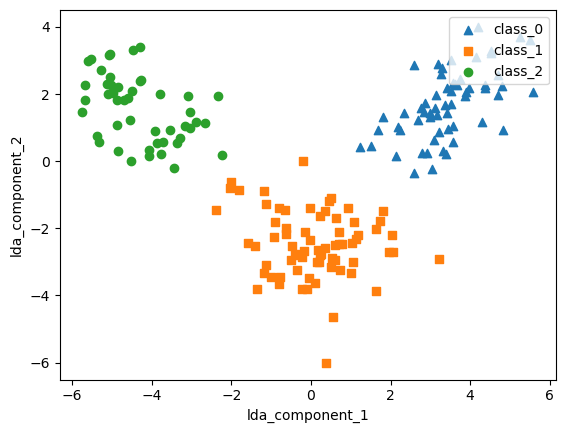

In [9]:
lda_columns = ['lda_component_1', 'lda_component_2']
wineDF_lda = pd.DataFrame(wine_lda, columns=lda_columns)
wineDF_lda['target'] = wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 3. SVD

#### 3-1. SVD 연산 생성 및 분해
- 랜덤한 3*3 행렬 A를 생성하고 SVD 분해 후 행렬 값을 출력해 주세요.

In [11]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)

# 3x3 랜덤 행렬 A 생성
A = np.random.rand(3, 3)
print(np.round(A, 3))

# SVD 분해
U, Sigma, Vt = svd(A)

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]
(3, 3) (3,) (3, 3)
U matrix:
 [[-0.229 -0.148 -0.962]
 [-0.679 -0.684  0.267]
 [-0.697  0.715  0.057]]
Sigma Value:
 [1.342 0.315 0.123]
V transpose matrix:
 [[-0.385 -0.843 -0.375]
 [ 0.878 -0.209 -0.43 ]
 [-0.284  0.495 -0.821]]


#### 3-2. U, Σ, Vt로 행렬 A 복원
- Sigma 행렬을 다시 0을 포함한 대칭행렬로 변환한 뒤, 내적으로 복원을 수행해 주세요.

In [12]:
# Sigma를 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)

# 복원 행렬 A_
A_ = U @ Sigma_mat @ Vt

print(np.round(A_, 3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


#### 3-3. TruncatedSVD 변환
- wine 데이터셋을 계속 활용합니다.

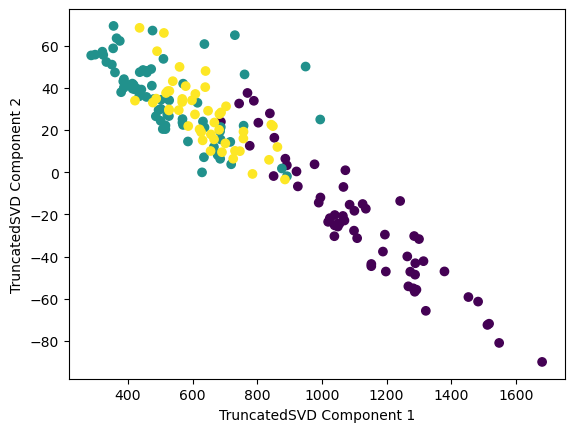

In [13]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

# 산점도 2차원으로 시각화
plt.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

#### 3-4. 스케일링 + TruncatedSVD vs PCA 비교

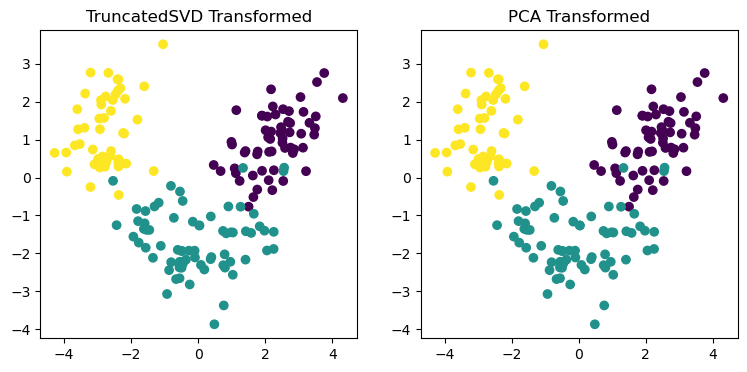

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 와인 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

# (왼) TruncatedSVD 변환 데이터 (오) PCA 변환 데이터 시각화
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
ax2.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], c=wine.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

plt.show()

## 4. NMF

#### 4-1. NMF 적용

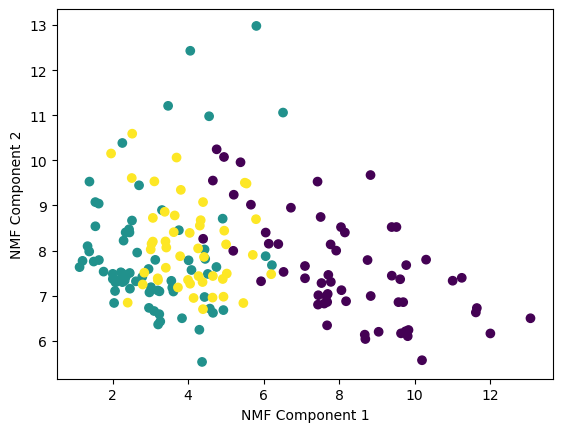

In [15]:
from sklearn.decomposition import NMF

# NMF 객체 생성
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)

plt.scatter(x=wine_nmf[:, 0], y=wine_nmf[:, 1], c=wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()

## 5. T-SNE


#### 5-1. T-SNE를 이용한 차원 축소
- wine 데이터셋을 T-SNE를 이용하여 2차원으로 축소해 주세요.


In [16]:
from sklearn.manifold import TSNE

# wine 데이터를 StandardScaler로 표준화
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# T-SNE 객체 생성 (n_components=2, random_state=42)
tsne = TSNE(n_components=2, random_state=42)

# T-SNE 변환 수행
wine_tsne = tsne.fit_transform(wine_scaled)

print('변환 전 차원:', wine_ftrs.shape)
print('변환 후 차원:', wine_tsne.shape)


C:\Users\minse\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\minse\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\minse\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\minse\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


변환 전 차원: (178, 13)
변환 후 차원: (178, 2)


#### 5-2. T-SNE 변환 데이터 시각화
- T-SNE로 변환된 데이터를 2차원 산점도로 시각화하고, wine의 클래스별로 다른 색상으로 표현해 주세요.


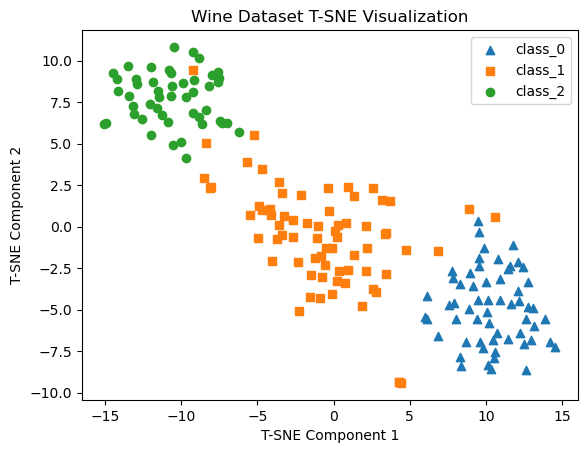

In [17]:
# T-SNE 변환 결과를 DataFrame으로 생성
tsne_columns = ['tsne_component_1', 'tsne_component_2']
wineDF_tsne = pd.DataFrame(wine_tsne, columns=tsne_columns)
wineDF_tsne['target'] = wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wineDF_tsne[wineDF_tsne['target']==i]['tsne_component_1']
    y_axis_data = wineDF_tsne[wineDF_tsne['target']==i]['tsne_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.title('Wine Dataset T-SNE Visualization')
plt.show()


#### 5-3. T-SNE와 PCA 비교 및 개념 확인
- 아래 질문에 답변해 주세요.


**Q1. 다음 O/X 문제를 풀어주세요.**
<br> X일 경우, 이유도 간략히 작성해 주세요.

1) T-SNE는 PCA와 달리 비선형 차원 축소 기법이다. (O / X)
2) T-SNE는 새로운 데이터가 들어왔을 때 기존 모델로 변환할 수 있다. (O / X)
3) T-SNE는 주로 데이터 시각화 목적으로 사용된다. (O / X)
4) T-SNE는 PCA보다 항상 빠르게 계산된다. (O / X)

###답안###
1) O
2) X / T-SNE는 변환 함수가 없어 새로운 데이터에 적용이 어려움
3) O
4) X / T-SNE는 계산 복잡도가 높아 대규모 데이터에서는 느림

**Q2. 5-2에서 시각화한 T-SNE 결과와 1-2에서 시각화한 PCA 결과를 비교했을 때, 클래스 분리 측면에서 어떤 차이가 있는지 간략히 서술하세요.**

###답안###

T-SNE는 데이터의 국소 구조를 잘 보존하여 시각화 결과에서 클래스 간 경계가 더 선명하게 나타난다.
반면 PCA는 선형 변환이기 때문에 데이터가 상호 섞여 보일 수 있다.